In [2]:
# Imports and configurations

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/jackal0206/public_files/main/train.csv')

# data description: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [4]:
# Preliminary analysis
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

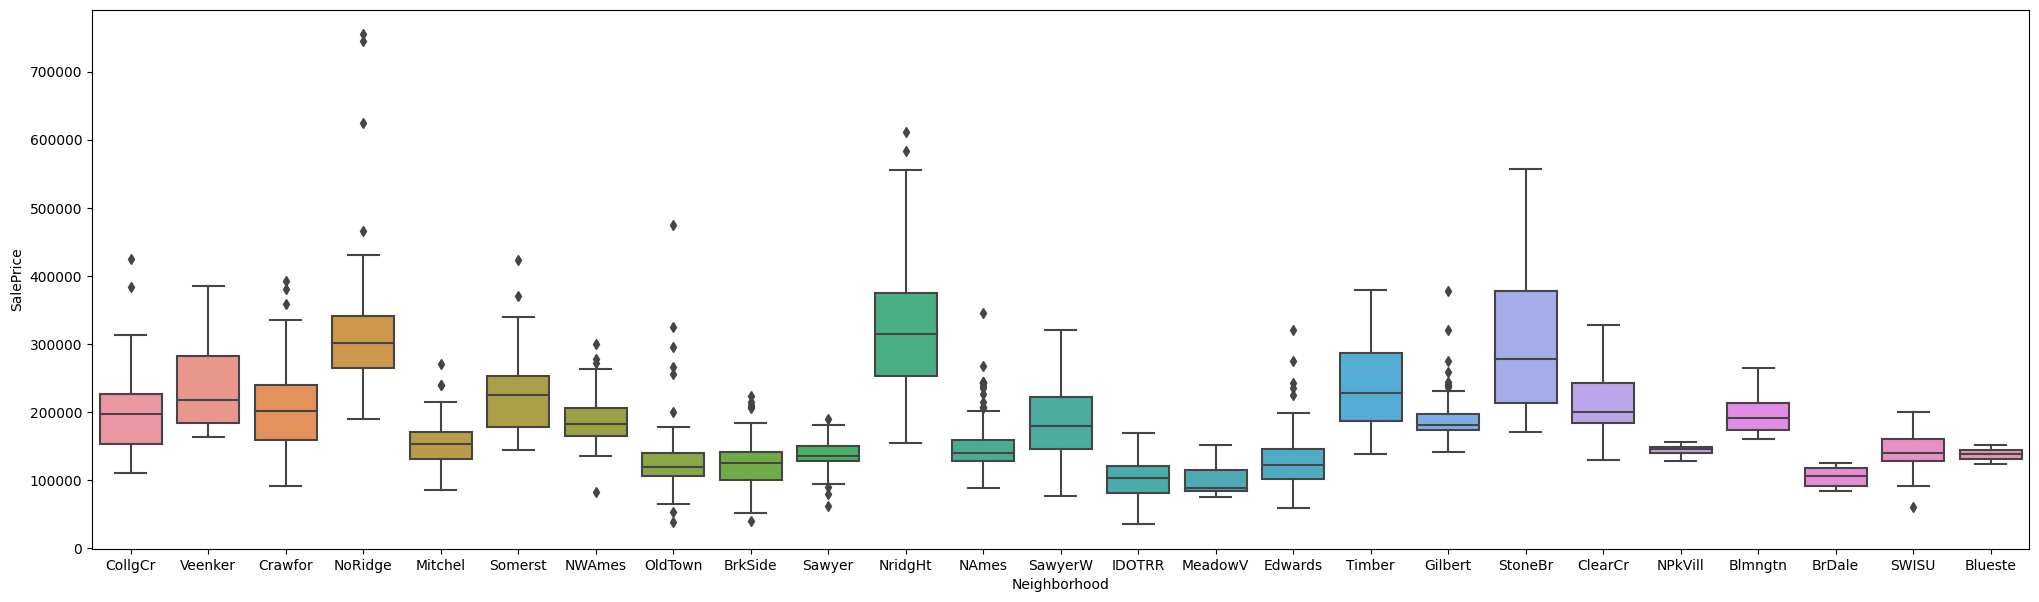

In [6]:
plt.rc('figure', figsize=(25, 7))

sns.boxplot(df[['Neighborhood', 'SalePrice']], x='Neighborhood', y='SalePrice')

([<matplotlib.axis.XTick at 0x7875ce9a9a20>,
 [Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010')])

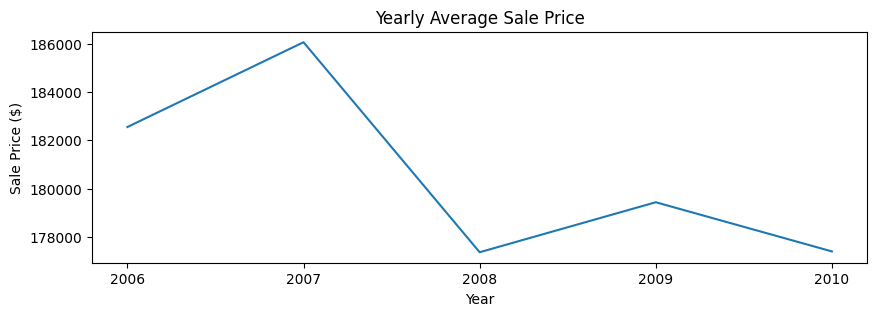

In [7]:
plt.rc('figure', figsize=(10, 3))
df.groupby('YrSold')['SalePrice'].mean().plot()
plt.title("Yearly Average Sale Price")
plt.ylabel("Sale Price ($)")
plt.xlabel("Year")
plt.xticks(df.groupby('YrSold')['SalePrice'].mean().index)

<Axes: xlabel='MoSold'>

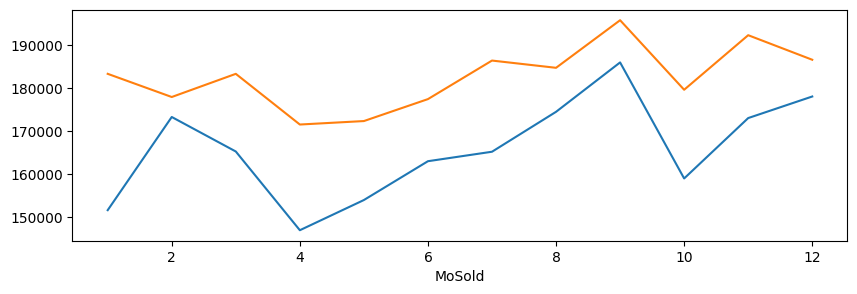

In [8]:
plt.rc('figure', figsize=(10, 3))
df.groupby('MoSold')['SalePrice'].median().plot()
df.groupby('MoSold')['SalePrice'].mean().plot()

Text(0.5, 0, 'Time (Year, Month)')

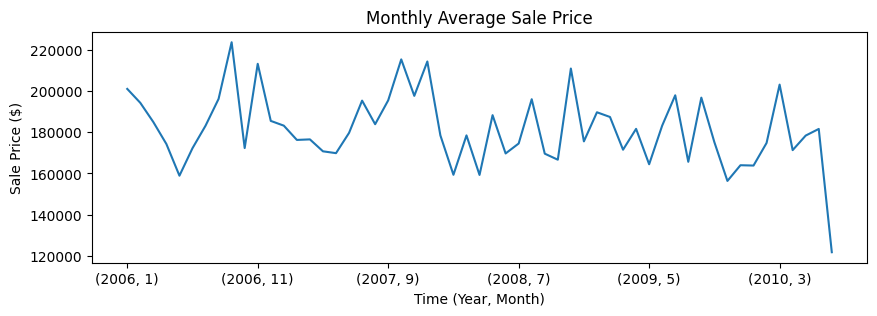

In [9]:
plt.rc('figure', figsize=(10, 3))

df.groupby(['YrSold', 'MoSold'])['SalePrice'].mean().plot()
plt.title("Monthly Average Sale Price")
plt.ylabel("Sale Price ($)")
plt.xlabel("Time (Year, Month)")
#plt.xticks(np.arange(len(df.groupby(['YrSold', 'MoSold'])['SalePrice'].mean().index)))


In [10]:
df.groupby(['YrSold', 'MoSold'])['SalePrice'].mean().index.map(lambda i: str(i[0]) + '-' + str(i[1]))

Index(['2006-1', '2006-2', '2006-3', '2006-4', '2006-5', '2006-6', '2006-7',
       '2006-8', '2006-9', '2006-10', '2006-11', '2006-12', '2007-1', '2007-2',
       '2007-3', '2007-4', '2007-5', '2007-6', '2007-7', '2007-8', '2007-9',
       '2007-10', '2007-11', '2007-12', '2008-1', '2008-2', '2008-3', '2008-4',
       '2008-5', '2008-6', '2008-7', '2008-8', '2008-9', '2008-10', '2008-11',
       '2008-12', '2009-1', '2009-2', '2009-3', '2009-4', '2009-5', '2009-6',
       '2009-7', '2009-8', '2009-9', '2009-10', '2009-11', '2009-12', '2010-1',
       '2010-2', '2010-3', '2010-4', '2010-5', '2010-6', '2010-7'],
      dtype='object')

Text(0.5, 0, 'Month')

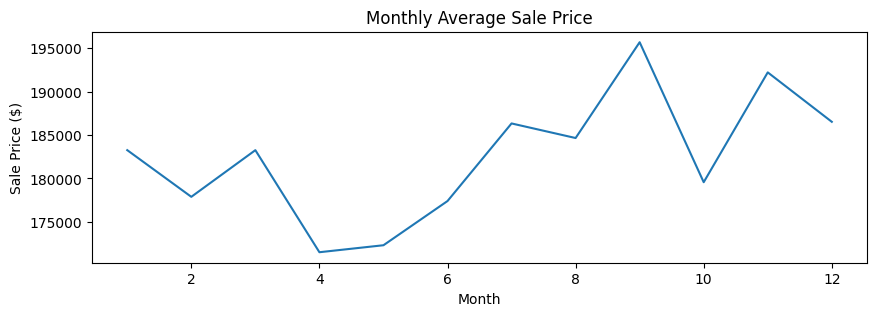

In [11]:
plt.rc('figure', figsize=(10, 3))

df.groupby(['MoSold'])['SalePrice'].mean().plot()
plt.title("Monthly Average Sale Price")
plt.ylabel("Sale Price ($)")
plt.xlabel("Month")

Text(0.5, 0, 'Month')

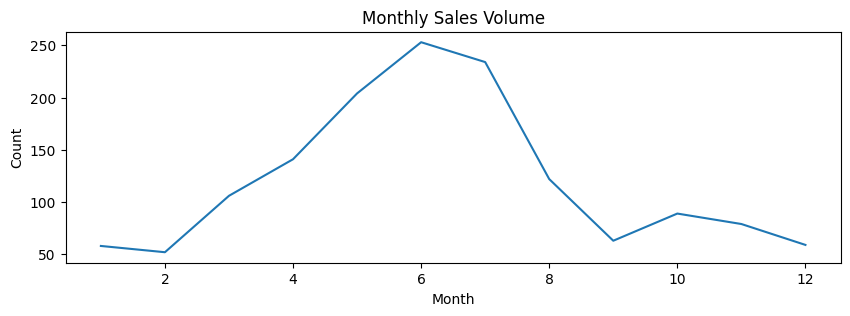

In [12]:
plt.rc('figure', figsize=(10, 3))

df.groupby(['MoSold'])['SalePrice'].count().plot()
plt.title("Monthly Sales Volume")
plt.ylabel("Count")
plt.xlabel("Month")

<Axes: xlabel='YrSold,MoSold'>

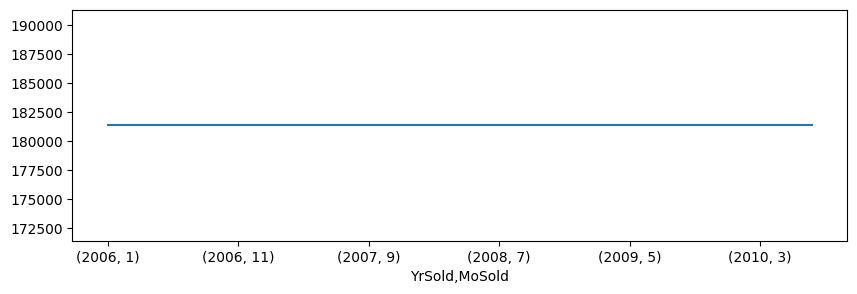

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/jackal0206/public_files/main/train.csv')

# build df2, which is the average sale price for each year-month
df_monthly_ratio = pd.DataFrame(df.groupby(['YrSold', 'MoSold'])['SalePrice'].mean().mean() / df.groupby(['YrSold', 'MoSold'])['SalePrice'].mean())
df_monthly_ratio.rename(columns={'SalePrice': 'AdjRatio'}, inplace=True)

# merge df1 with df2, so the adjustment ratio is populated for each row
df_adjusted = df.merge(df_monthly_ratio, how='left', on=['YrSold', 'MoSold'])

# add a new column and calculate the adjusted price
df_adjusted['AdjSalePrice'] = df_adjusted['SalePrice'] * df_adjusted['AdjRatio']

df_adjusted.groupby(['YrSold', 'MoSold'])['AdjSalePrice'].mean().plot()


<Axes: xlabel='Neighborhood', ylabel='AdjSalePrice'>

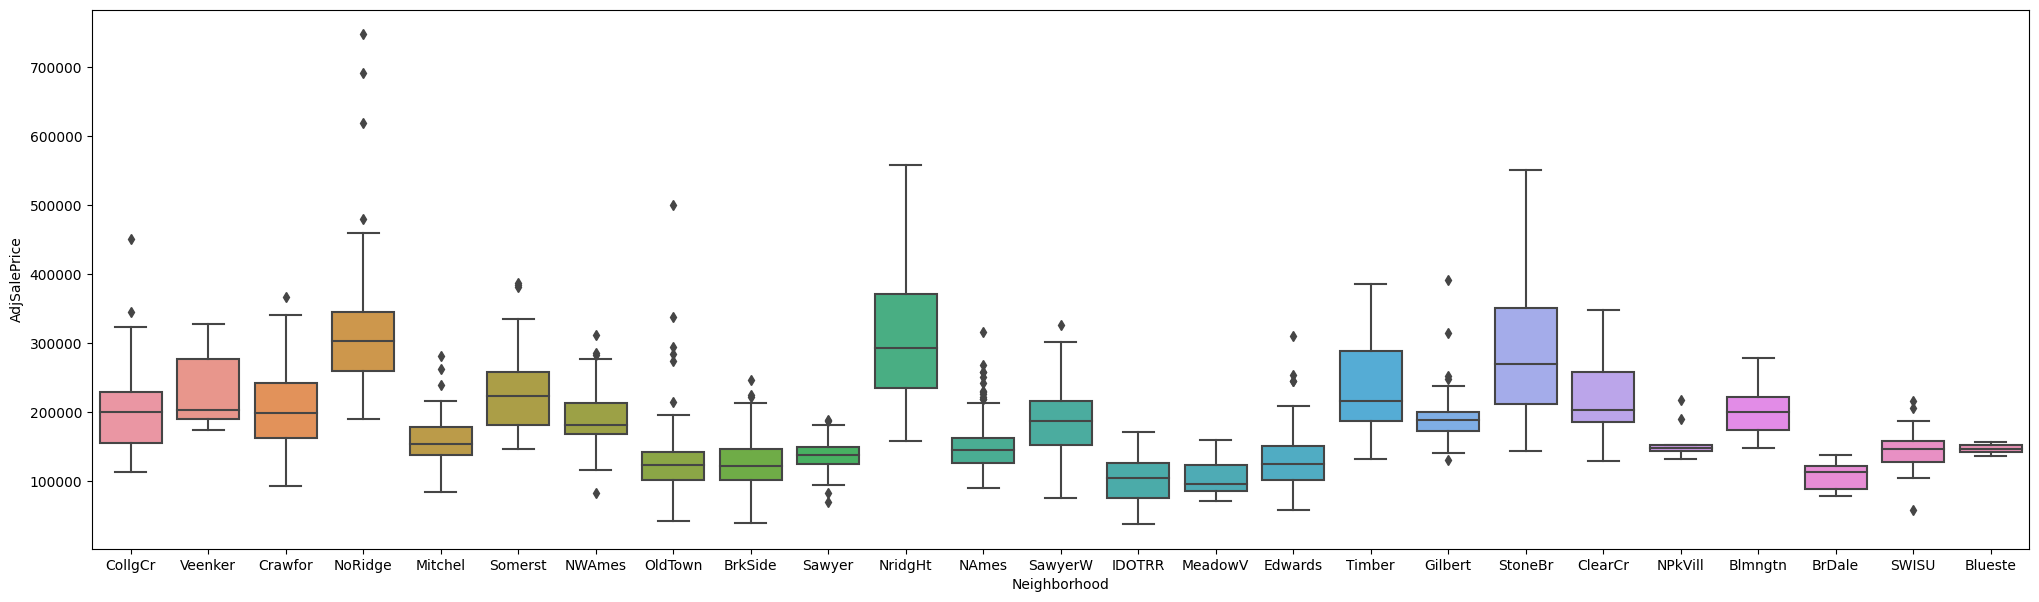

In [14]:
plt.rc('figure', figsize=(25, 7))

sns.boxplot(df_adjusted[['Neighborhood', 'AdjSalePrice']], x='Neighborhood', y='AdjSalePrice')

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

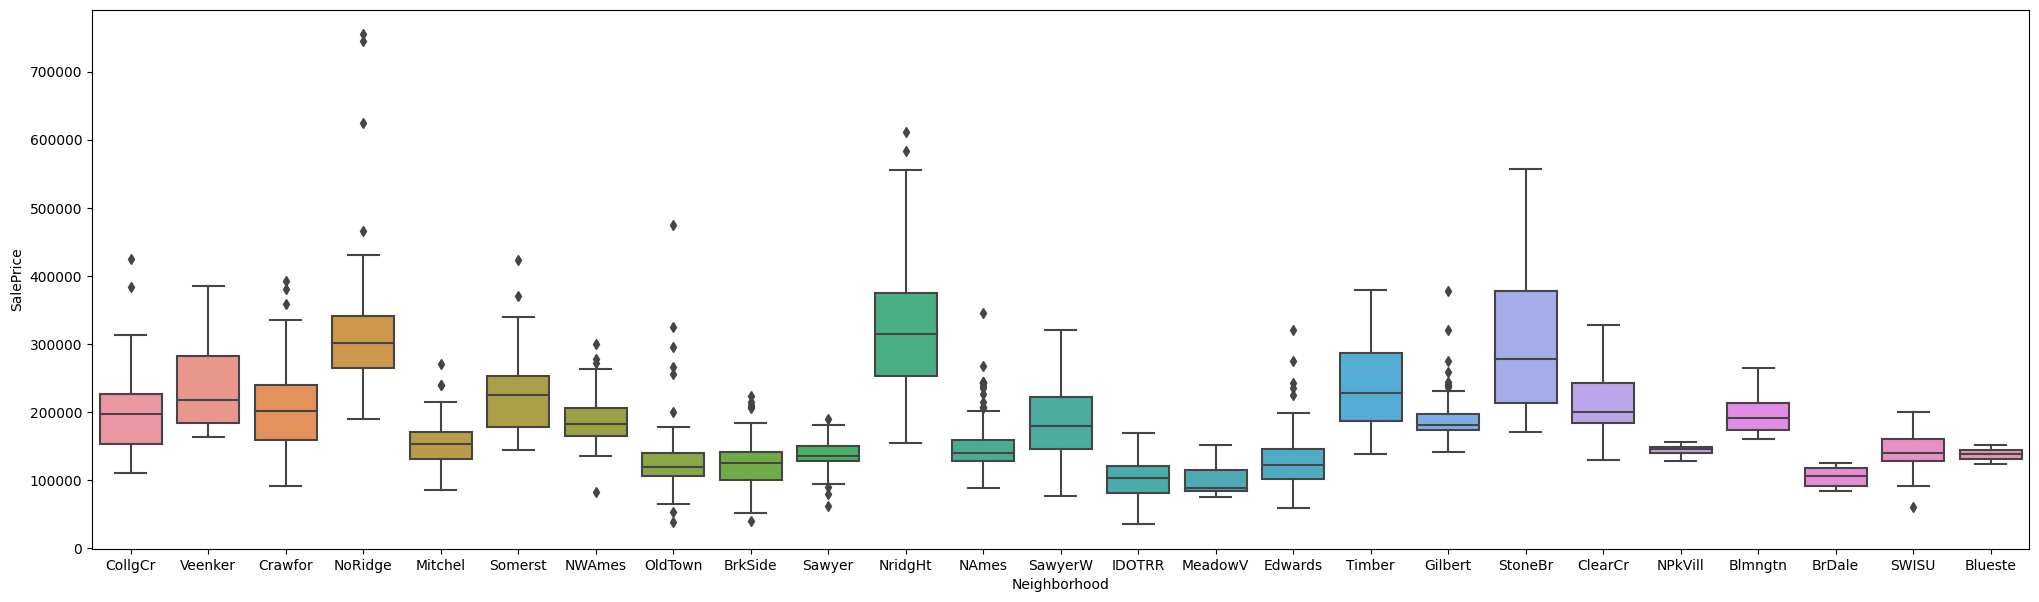

In [15]:
sns.boxplot(df_adjusted[['Neighborhood', 'SalePrice']], x='Neighborhood', y='SalePrice')

In [16]:
df_adjusted = pd.read_csv('https://raw.githubusercontent.com/jackal0206/public_files/main/train_adjusted.csv')

df_adjusted

,Unnamed: 0.1,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AdjSalePrice
0,0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,398750.982473
1,1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,401247.755503
2,2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,368453.793465
3,3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,307042.407728
4,4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,459555.010815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,307101.075328
1456,1456,1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,382687.537712
1457,1457,1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,399864.532624
1458,1458,1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,236296.050474


In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/jackal0206/public_files/main/train_adjusted.csv')


<Axes: xlabel='YearBuilt'>

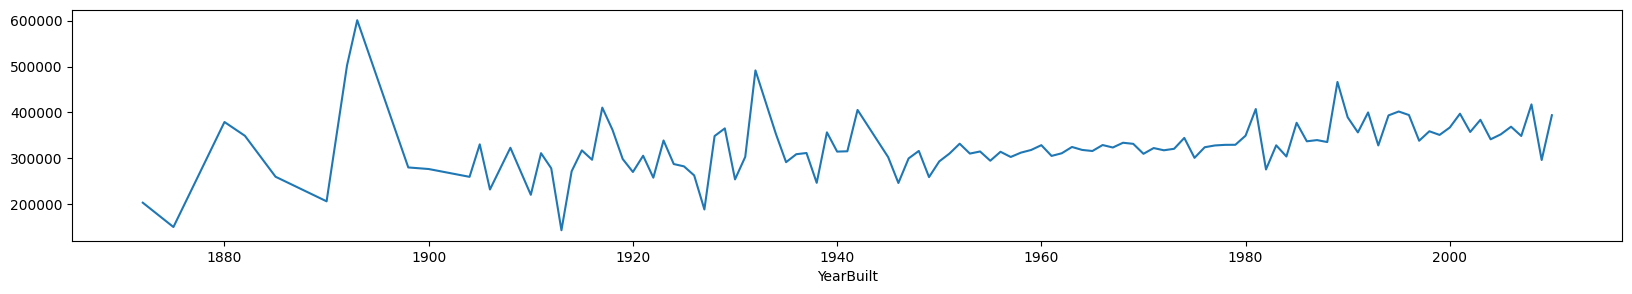

In [18]:
plt.rc('figure', figsize=(20, 3))
df.groupby('YearBuilt')['AdjSalePrice'].mean().plot()

<Axes: xlabel='YearBuilt'>

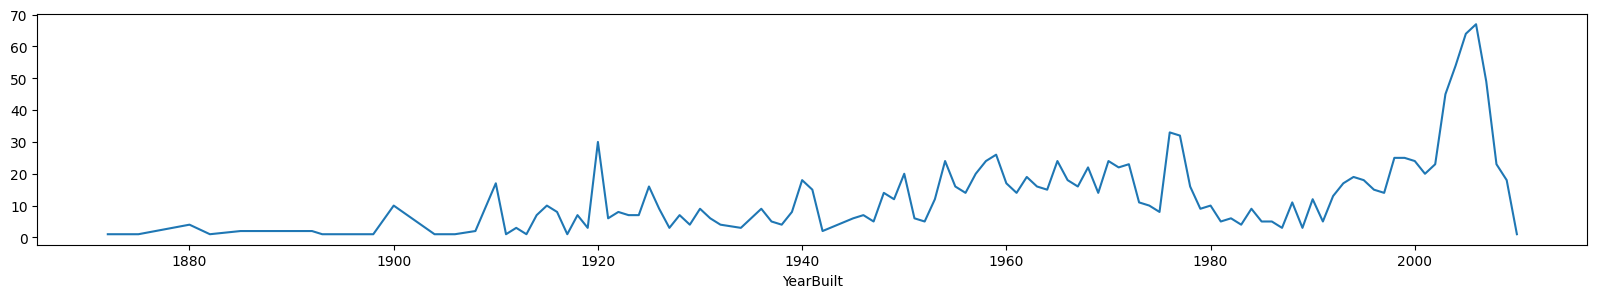

In [19]:
plt.rc('figure', figsize=(20, 3))

df.groupby('YearBuilt')['AdjSalePrice'].count().plot()

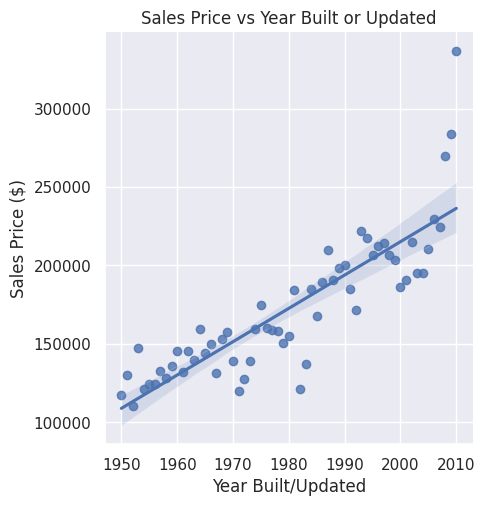

In [34]:
df['YrLastUpdated'] = df[['YearBuilt', 'YearRemodAdd']].max(axis=1)

grouped = pd.DataFrame(df.groupby('YrLastUpdated')['SalePrice'].mean())
grouped['YrLastUpdated'] = grouped.index.values

fig = sns.lmplot(data=grouped, x='YrLastUpdated', y='SalePrice').set(title="Sales Price vs Year Built or Updated")
fig.set_ylabels('Sales Price ($)')
fig.set_xlabels('Year Built/Updated')


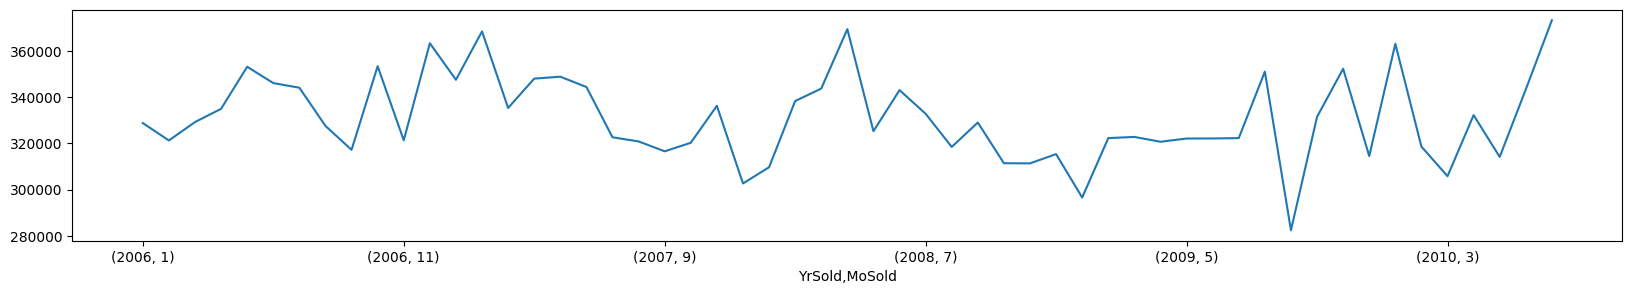

In [86]:
# use the 2010 price as baseline
df_ratio = pd.DataFrame(df.groupby('YrLastUpdated')['AdjSalePrice'].mean().loc[2010] / df.groupby('YrLastUpdated')['AdjSalePrice'].mean())

# calculate the adjustment ratio
df_ratio.rename(columns={'AdjSalePrice': 'AdjRatioYrUpdated'}, inplace=True)

# merge the adjustment ratio with the original data set
df_adjusted = df.merge(df_ratio, how='left', on=['YrLastUpdated'])

# adjust the price
df_adjusted['AdjSalePrice2'] = df_adjusted['AdjSalePrice'] * df_adjusted['AdjRatioYrUpdated']

# remove and rename columns
df_adjusted.drop(columns=['AdjRatio', 'AdjSalePrice', 'YrLastUpdated', 'AdjRatioYrUpdated'], inplace=True)
df_adjusted.rename(columns={'AdjSalePrice2': 'AdjSalePrice'}, inplace=True)

df_adjusted.groupby(['YrSold', 'MoSold'])['AdjSalePrice'].mean().plot()

df_adjusted.to_csv('train_adjusted.csv')

In [87]:
to_plt = pd.DataFrame(df_adjusted.groupby(['YrSold', 'MoSold'])['AdjSalePrice'].mean())

to_plt['time']